# Importing python libraries & adjusting display:

In [1]:
# print(just to start without output)

In [2]:
# import libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from scipy import stats

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf




In [3]:
# Adjusting some dispaly options for data frame :
pd.set_option('display.max_rows',None)                 # display all rows
pd.set_option('display.max_columns',None)              # display all columns
pd.set_option('display.float_format','{:,}'.format)    # show , after thousands

# Content:
         Section-1: Gathering & introducing Data :
         Section-2: Data Cleaning (General):
                     A- Data types
                     B- Handling missing points
                     C- More data cleaning
         Section-3: Data Analyzing & Handling (Specific):
                     A- Exploring data
                     B- Otliers handling
                     C- Matching standard check
         Section-4: Visualizing Clean Data
         Section-5: Interactive data visualization
         

# Section-1 : Gathering & introducing Data :

## A- Gathering Data:

In [4]:
# Gathering data from different csv sheets (Directly exported from TWM):
os.chdir(r'C:\\Users\\hp\\Desktop\\conda codes\\Data')
df = pd.DataFrame()
count = 1
for file in os.listdir():
    file_name, file_ext = os.path.splitext(file)
    if file_ext == '.csv':
        df_sub = pd.read_csv(file)
        df = pd.concat([df,df_sub],sort=True)
        count +=1
    else:
        pass
print('Data Has been imported from {} sheets'.format(count))

Data Has been imported from 35 sheets


## B-Introducing data:

In [5]:
# check size of data: (including FL shots, as TWM doesnot have option to separate)
row_num, col_num = df.shape
print('total number of rows :{}, total number of columns :{}'.format(row_num, col_num))

total number of rows :15742, total number of columns :59


In [6]:
# Exploring tabulated data:
df.head()

,100489320quid (%),1343664010quid (%),1742857231quid (%),216223759quid (%),387778418quid (%),716680292quid (%),762406135quid (%),-1040455237quid (%),-1296773676quid (%),-1432825765quid (%),-1656969316quid (%),-1866484898quid (%),-2062547988quid (%),-389501417quid (%),-57986962quid (%),-685014685quid (%),-797585780quid (%),-876888990quid (%),-909058379quid (%),Calc. Fluid Load (lbf),Calculate Buoyant Rod Weight (lbf),Damp Down,Damp Up,Date,Dynamometer Date,Effective Plunger Stroke (in),Equivalent Gas Free Liquid HT (TVD) (ft),Formation Depth (ft),Formation Depth TVD (ft),Gas Specific Gravity (Sp.Gr.AIR),Gearbox Peak Existing (in-lb),Gearbox Rating (in-lb),MPMPL (lb),MPRL (lb),Measured Load SV (lbf),Measured Load TV (lbf),Measured Stroke Length (in),Oil API (deg.API),PPMPL (lb),PPRL (lb),Plunger Diameter (in),Plunger Stroke (in),Polished Rod Power (HP),Pump Displacement (BBL/D),Pump Intake Depth (ft),Pump Intake Depth TVD (ft),Pump Intake Pressure (psi (g)),Pump Volumetric Fillage (%),Rated HP (HP),SPM (spm),Stroke,Total Gaseous Liquid Column HT (TVD) (ft),Tubing OD (in),Tubing Pressure (psi (g)),Unaccounted Friction (lb),Unnamed: 40,Water Specific Gravity (Sp.Gr.H2O),Well,Well.1
0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3075,4259,0.017,0.017,09/23/11 - 16:36,09/23/11 - 16:54,106.4,1072,"1,700.0","1,700.0",X,127266.6,912000,477,3733,5163,6306,108.481,15.0,2458,7432,2.250,107.5,3.5,423.6,"1,700.0","1,700.0",433.5,99.01,62,6.742,55,1072,3.5,X,477.2,nan,1.03,AG 10,AG 10
1,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3528,4885,0.017,0.017,05/10/12 - 08:53,05/10/12 - 09:07,109.5,1216,"1,950.0","1,950.0",X,130186.6,912000,-174,3584,4915,5848,111.851,15.0,1550,7185,2.250,110.6,3.6,434.1,"1,950.0","1,950.0",493.5,99.00,62,6.716,47,1303,3.5,X,174.4,nan,1.03,AG 10,AG 10
2,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3528,4885,0.017,0.017,07/20/12 - 10:31,07/20/12 - 11:11,109.5,1295,"1,950.0","1,950.0",X,128521.3,912000,-36,3733,5099,6316,111.851,15.0,1864,7692,2.250,110.6,3.7,434.0,"1,950.0","1,950.0",527.3,98.98,62,6.716,55,1320,3.5,X,36.0,nan,1.03,AG 10,AG 10
3,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3483,4885,0.005,0.005,10/01/12 - 09:02,10/01/12 - 09:25,110.8,1247,"1,925.0","1,925.0",X,117149.4,912000,-81,3764,5642,6152,111.851,15.0,1793,7444,2.250,111.6,2.5,439.3,"1,925.0","1,925.0",505.4,99.29,62,6.716,54,1247,3.5,X,81.1,nan,1.03,AG 10,AG 10
4,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2352,3257,0.013000000000000001,0.013000000000000001,01/03/13 - 09:07,01/03/13 - 09:07,126.2,X,"1,300.0","1,300.0",X,156141.0,640000,-159,1569,3314,4218,127.926,15.0,2072,6131,2.250,127.2,5.6,609.4,"1,300.0","1,300.0",X,99.19,62,8.182,56,X,3.5,X,158.8,nan,1.03,AG 10,AG 10


In [7]:
# check names of columns:
df.columns

Index([' 100489320quid (%)', ' 1343664010quid (%)', ' 1742857231quid (%)',
       ' 216223759quid (%)', ' 387778418quid (%)', ' 716680292quid (%)',
       ' 762406135quid (%)', '-1040455237quid (%)', '-1296773676quid (%)',
       '-1432825765quid (%)', '-1656969316quid (%)', '-1866484898quid (%)',
       '-2062547988quid (%)', '-389501417quid (%)', '-57986962quid (%)',
       '-685014685quid (%)', '-797585780quid (%)', '-876888990quid (%)',
       '-909058379quid (%)', 'Calc. Fluid Load (lbf)',
       'Calculate Buoyant Rod Weight (lbf)', 'Damp Down', 'Damp Up', 'Date',
       'Dynamometer Date', 'Effective Plunger Stroke (in)',
       'Equivalent Gas Free Liquid HT (TVD) (ft)', 'Formation Depth (ft)',
       'Formation Depth TVD (ft)', 'Gas Specific Gravity (Sp.Gr.AIR)',
       'Gearbox Peak Existing (in-lb)', 'Gearbox Rating (in-lb)', 'MPMPL (lb)',
       'MPRL (lb)', 'Measured Load SV (lbf)', 'Measured Load TV (lbf)',
       'Measured Stroke Length (in)', 'Oil API (deg.API)', 'PPMPL

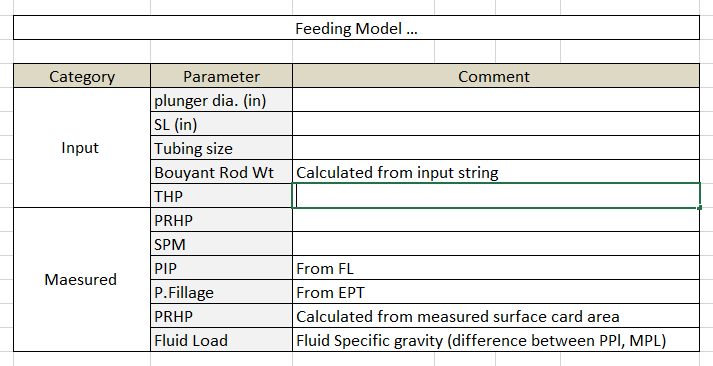

In [8]:
# Filter table and use only required parameters with basic modificatios:
Image(filename='model params.PNG')

In [9]:
params = ['Measured Stroke Length (in)', 'Pump Intake Depth (ft)', 'Plunger Diameter (in)',
          'Tubing Pressure (psi (g))','Tubing OD (in)', 'Polished Rod Power (HP)', 'PPMPL (lb)',
          'Unaccounted Friction (lb)', 'SPM (spm)', 'Pump Volumetric Fillage (%)','MPMPL (lb)',
          'Calculate Buoyant Rod Weight (lbf)','Pump Intake Pressure (psi (g))']
df=df[params]
df.rename(columns={'Measured Stroke Length (in)':'SL (in)','Pump Intake Depth (ft)':'PD (ft)','Plunger Diameter (in)':'P.Dia (in)','Tubing Pressure (psi (g))':'THP (psi)','Tubing OD (in)':'TBG O.D (in)','Polished Rod Power (HP)':'PRHP','Unaccounted Friction (lb)':'Friction (lb)','Pump Volumetric Fillage (%)':'Fillage (%)','Calculate Buoyant Rod Weight (lbf)':'B.Weight (lbf)','Pump Intake Pressure (psi (g))':'PIP (psi)'},inplace=True)
df=df[['P.Dia (in)', 'SL (in)','SPM (spm)','B.Weight (lbf)', 'Fillage (%)','PD (ft)', 'THP (psi)','PIP (psi)','PPMPL (lb)','MPMPL (lb)', 'Friction (lb)','PRHP' ]]
df.head()

,P.Dia (in),SL (in),SPM (spm),B.Weight (lbf),Fillage (%),PD (ft),THP (psi),PIP (psi),PPMPL (lb),MPMPL (lb),Friction (lb),PRHP
0,2.250,108.481,6.742,4259,99.01,"1,700.0",X,433.5,2458,477,477.2,3.5
1,2.250,111.851,6.716,4885,99.00,"1,950.0",X,493.5,1550,-174,174.4,3.6
2,2.250,111.851,6.716,4885,98.98,"1,950.0",X,527.3,1864,-36,36.0,3.7
3,2.250,111.851,6.716,4885,99.29,"1,925.0",X,505.4,1793,-81,81.1,2.5
4,2.250,127.926,8.182,3257,99.19,"1,300.0",X,X,2072,-159,158.8,5.6


In [10]:
# check size of data:
row_num, col_num = df.shape
print('total number of columns : {} column'.format(col_num))

total number of columns : 12 column


# Section-2: Data Cleaning (General):


 ##  A- Data types:

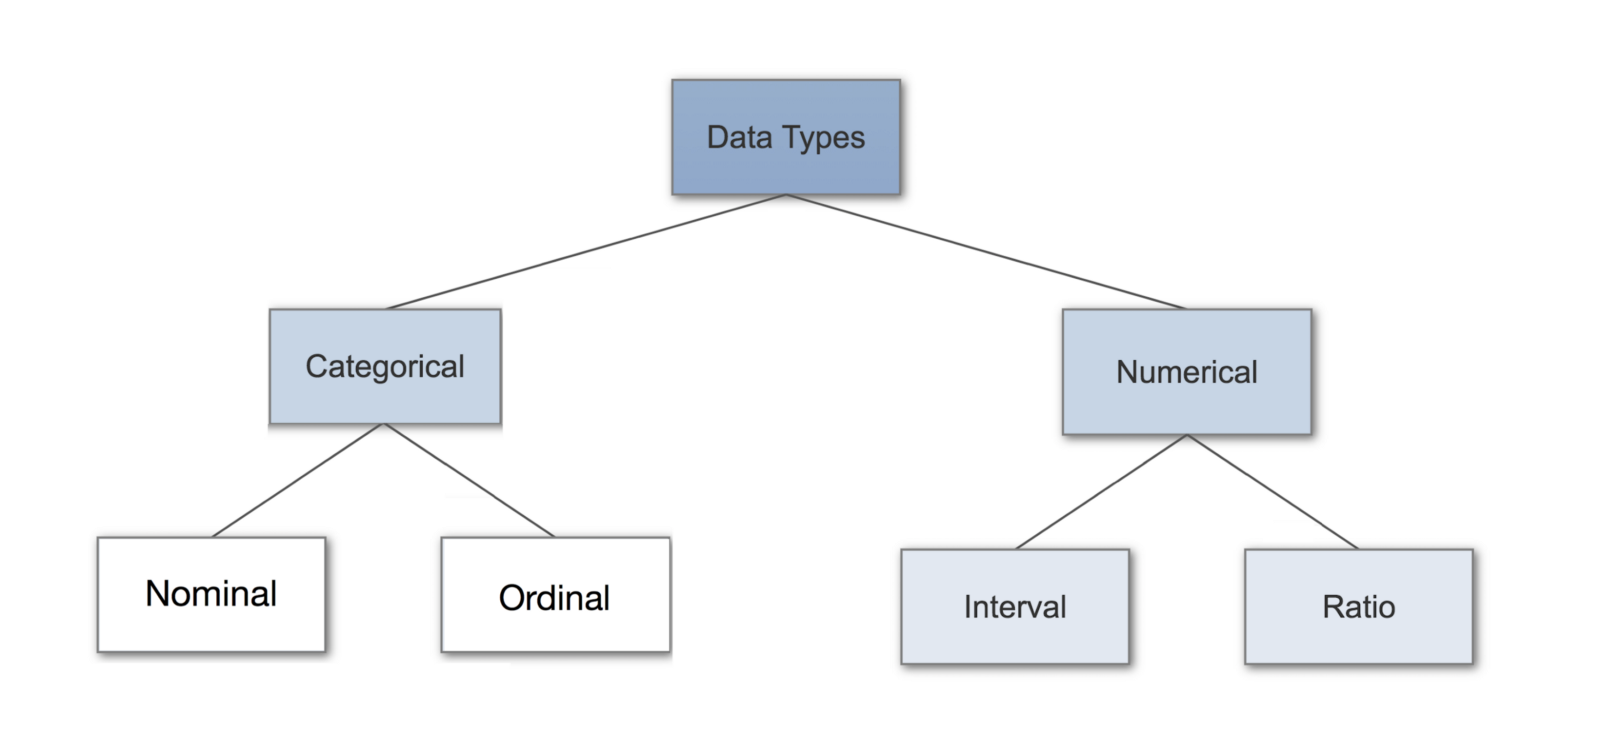

In [11]:
# Data can be divided into (Numeriacl & Categorial):
Image('Data types.png')

In [12]:
# Check data type of each column:
df.dtypes           # following coding terminolgy : Numerical ----> (int, float)  & Categorial -----> (object)

P.Dia (in)        object
SL (in)           object
SPM (spm)         object
B.Weight (lbf)    object
Fillage (%)       object
PD (ft)           object
THP (psi)         object
PIP (psi)         object
PPMPL (lb)        object
MPMPL (lb)        object
Friction (lb)     object
PRHP              object
dtype: object

In [13]:
# Modifying Data types to numeric value to enable calculations:
for col in df.columns:
    df[col]=pd.to_numeric(df[col], errors='coerce')   
df.dtypes

P.Dia (in)        float64
SL (in)           float64
SPM (spm)         float64
B.Weight (lbf)    float64
Fillage (%)       float64
PD (ft)           float64
THP (psi)         float64
PIP (psi)         float64
PPMPL (lb)        float64
MPMPL (lb)        float64
Friction (lb)     float64
PRHP              float64
dtype: object

In [14]:
# Adjusting number of decimal points:
df= df.round({'P.Dia (in)':2, 'SPM (spm)':1,'SL (in)':0,'Fillage (%)':0,'PIP (psi)':0,'PD (ft)':0, 'Friction (lb)':0})
df.head()

,P.Dia (in),SL (in),SPM (spm),B.Weight (lbf),Fillage (%),PD (ft),THP (psi),PIP (psi),PPMPL (lb),MPMPL (lb),Friction (lb),PRHP
0,2.25,108.0,6.7,"4,259.0",99.0,"1,700.0",nan,434.0,"2,458.0",477.0,477.0,3.5
1,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",nan,494.0,"1,550.0",-174.0,174.0,3.6
2,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",nan,527.0,"1,864.0",-36.0,36.0,3.7
3,2.25,112.0,6.7,"4,885.0",99.0,"1,925.0",nan,505.0,"1,793.0",-81.0,81.0,2.5
4,2.25,128.0,8.2,"3,257.0",99.0,"1,300.0",nan,nan,"2,072.0",-159.0,159.0,5.6


In [15]:
# will convert fillage to categorial column ('low','medium','high') [as it will be udated in model in as category]:
bins = [0, 35, 70, 100]
labels = ['low', 'medium', 'high']
df=df.drop(df['Fillage (%)'] == 'X'.index)
df['Fillage_cat']= pd.cut(df['Fillage (%)'], labels=labels, bins=bins)
df.head()


,P.Dia (in),SL (in),SPM (spm),B.Weight (lbf),Fillage (%),PD (ft),THP (psi),PIP (psi),PPMPL (lb),MPMPL (lb),Friction (lb),PRHP,Fillage_cat
1,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",nan,494.0,"1,550.0",-174.0,174.0,3.6,high
2,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",nan,527.0,"1,864.0",-36.0,36.0,3.7,high
3,2.25,112.0,6.7,"4,885.0",99.0,"1,925.0",nan,505.0,"1,793.0",-81.0,81.0,2.5,high
4,2.25,128.0,8.2,"3,257.0",99.0,"1,300.0",nan,nan,"2,072.0",-159.0,159.0,5.6,high
5,2.25,128.0,8.2,"3,257.0",99.0,"1,300.0",nan,160.0,"2,485.0",-524.0,524.0,7.3,high


In [16]:
df.dtypes

P.Dia (in)         float64
SL (in)            float64
SPM (spm)          float64
B.Weight (lbf)     float64
Fillage (%)        float64
PD (ft)            float64
THP (psi)          float64
PIP (psi)          float64
PPMPL (lb)         float64
MPMPL (lb)         float64
Friction (lb)      float64
PRHP               float64
Fillage_cat       category
dtype: object

In [17]:
# to feed categorial column to model, it should be numerical [Encoding as dummy variables]:
dummy_var = pd.get_dummies(df['Fillage_cat'], prefix='Fillage')
df= df.drop('Fillage_cat', axis=1)
df=pd.concat([df,dummy_var], axis=1)
df.head()

,P.Dia (in),SL (in),SPM (spm),B.Weight (lbf),Fillage (%),PD (ft),THP (psi),PIP (psi),PPMPL (lb),MPMPL (lb),Friction (lb),PRHP,Fillage_low,Fillage_medium,Fillage_high
1,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",nan,494.0,"1,550.0",-174.0,174.0,3.6,0,0,1
2,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",nan,527.0,"1,864.0",-36.0,36.0,3.7,0,0,1
3,2.25,112.0,6.7,"4,885.0",99.0,"1,925.0",nan,505.0,"1,793.0",-81.0,81.0,2.5,0,0,1
4,2.25,128.0,8.2,"3,257.0",99.0,"1,300.0",nan,nan,"2,072.0",-159.0,159.0,5.6,0,0,1
5,2.25,128.0,8.2,"3,257.0",99.0,"1,300.0",nan,160.0,"2,485.0",-524.0,524.0,7.3,0,0,1


## B- Handling missing data :

In [18]:
# check missing data:
df.replace('X', np.NaN, inplace=True)         # As TWM return 'X' for missing values (convert 'X', to Nan to hanle by pandas)
df.dropna(how='any',subset=['PRHP'],inplace=True)      # to remove data where PRHP not measured (FL shots) 
df.isnull().sum().sort_values(ascending=False)         # count missing data in each column

THP (psi)         3564
PIP (psi)         1314
B.Weight (lbf)     496
Fillage (%)         68
Friction (lb)        6
Fillage_high         0
Fillage_medium       0
Fillage_low          0
PRHP                 0
MPMPL (lb)           0
PPMPL (lb)           0
PD (ft)              0
SPM (spm)            0
SL (in)              0
P.Dia (in)           0
dtype: int64

In [19]:
# dealing with THP :
df['THP (psi)'] = df['THP (psi)'].fillna(150)   # value set to 150 psi (Artifical lift) as users not updated THP in TWM inputs
# dealing with PIP :
df['PIP (psi)'] = df['PIP (psi)'].fillna(df['PIP (psi)'].mean())   # Need to export PIP from valve test
# dealing with B.Rod weight :
df['B.Weight (lbf)'] = df['B.Weight (lbf)'].fillna(df['B.Weight (lbf)'].mean()) # May use forward filling (same field)
# dealing with Fillage :
df['Fillage (%)'] = df['Fillage (%)'].fillna(df['Fillage (%)'].mean()) 
# dealing with Friction :
df['Friction (lb)'] = df['Friction (lb)'].fillna(df['Friction (lb)'].mean()) 

In [20]:
# check all missing data handled:
df.isnull().sum().sort_values(ascending=False)                    

Fillage_high      0
Fillage_medium    0
Fillage_low       0
PRHP              0
Friction (lb)     0
MPMPL (lb)        0
PPMPL (lb)        0
PIP (psi)         0
THP (psi)         0
PD (ft)           0
Fillage (%)       0
B.Weight (lbf)    0
SPM (spm)         0
SL (in)           0
P.Dia (in)        0
dtype: int64

## C- More data cleaning:

In [21]:
# check for dublications :
df.duplicated().sum()


7

In [22]:
df.drop_duplicates(inplace=True)
df.shape

(3774, 15)

In [23]:
# Check Negative values:
  
    #################### need to check 

In [24]:
# handle Negative values & confirm:
  
    #################### need to handel

# Section-3: Data Analyzing & Handling (Specific):

## A- General statistics and visualization : 

In [25]:
# Generates descriptive statistics:
df.describe(percentiles=[.5]).T.round()   # for validation check min & max of (SPM, Fillage)

,count,mean,std,min,50%,max
P.Dia (in),"3,774.0",2.0,0.0,1.0,2.0,4.0
SL (in),"3,774.0",120.0,37.0,24.0,125.0,288.0
SPM (spm),"3,774.0",7.0,2.0,2.0,7.0,60.0
B.Weight (lbf),"3,774.0","10,472.0","3,653.0","1,359.0","10,490.0","22,957.0"
Fillage (%),"3,774.0",77.0,27.0,0.0,90.0,100.0
PD (ft),"3,774.0","5,450.0","2,103.0",564.0,"5,502.0","12,219.0"
THP (psi),"3,774.0",145.0,27.0,0.0,150.0,400.0
PIP (psi),"3,774.0",446.0,376.0,-4.0,445.0,"9,666.0"
PPMPL (lb),"3,774.0","5,668.0","3,642.0","-9,018.0","5,506.0","103,698.0"
MPMPL (lb),"3,774.0","-1,651.0","2,008.0","-40,465.0","-1,118.0","10,231.0"


In [26]:
# Generates visualization plots:

def plot_dist(n_rows,n_cols,df=pd.DataFrame(),fig_size=(30,30),bins=20):
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size)
    mycols=df.columns
    col_index=0
    if n_rows > 1:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.distplot(df_vis[mycols[col_index]], ax= ax[row][col], bins=bins)
                ax[row][col].set_title('Distribution plot for {} distribution'.format(mycols[col_index]))
                col_index +=1
    else:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.distplot(df[mycols[col_index]], ax= ax[col], bins=bins)
                ax[col].set_title('Distribution plot for {} '.format(mycols[col_index]))
                col_index +=1
                
def plot_box(n_rows,n_cols,df=pd.DataFrame(),fig_size=(30,30)):
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size)
    mycols=df.columns
    col_index=0
    if n_rows > 1:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.boxplot(df_vis[mycols[col_index]], ax= ax[row][col])
                ax[row][col].set_title('Box plot for {}'.format(mycols[col_index]))
                col_index +=1
    else:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.boxplot(df[mycols[col_index]], ax= ax[col])
                ax[col].set_title('Box plot for {} '.format(mycols[col_index]))
                col_index +=1


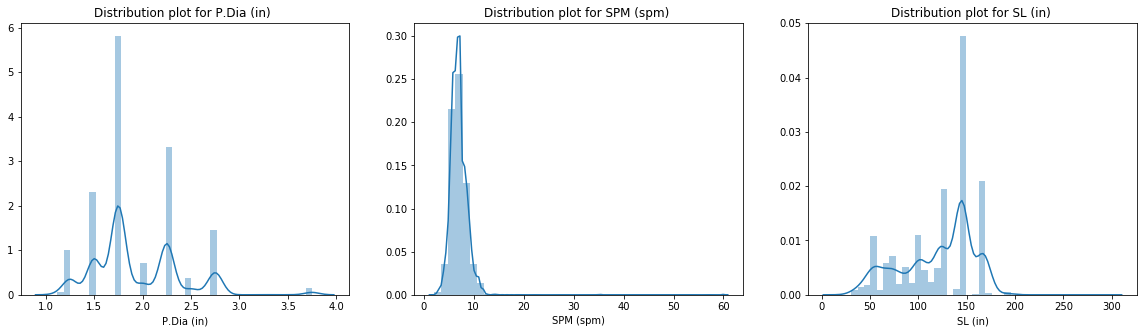

In [27]:
# plotting distribution plots: 
my_frame=df[['P.Dia (in)', 'SPM (spm)','SL (in)']]     # Main columns to visalize 
plot_dist(1,3,df=my_frame,fig_size=(20,5),bins=40)


# df_vis=df.drop(['Fillage_low','Fillage_medium','Fillage_high'], axis=1)   #to visualize all columns except dummy variables
# plot_dist(6,2,df=df_vis,fig_size=(30,35),bins=40)

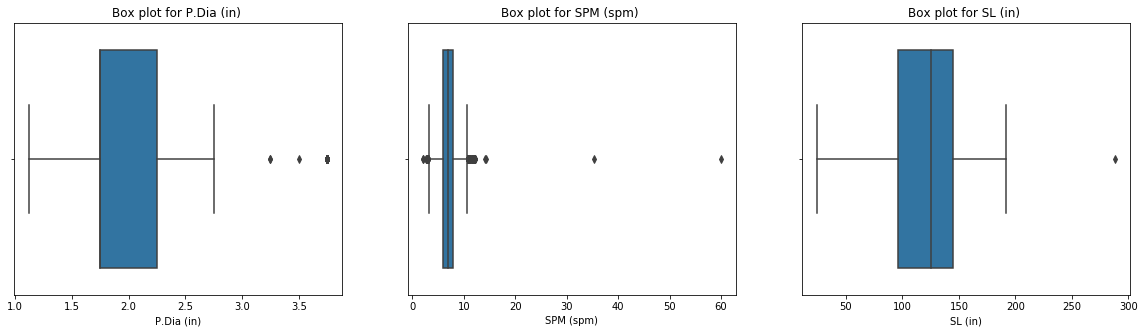

In [28]:
# plotting box plots: 
my_frame=df[['P.Dia (in)', 'SPM (spm)','SL (in)']]     # Main columns to visalize 
plot_box(1,3,df=my_frame,fig_size=(20,5))


# df_vis=df.drop(['Fillage_low','Fillage_medium','Fillage_high'], axis=1)   #to visualize all columns except dummy variables
# plot_box(6,2,df=df_vis,fig_size=(20,35))


## B- Otliers handling:

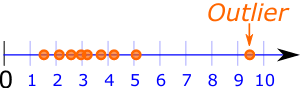

In [29]:
# Concept of outlier:
Image('outlier2.png')

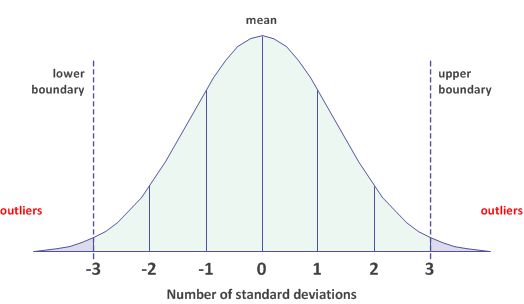

In [30]:
# how they appear on normal distribution: 
Image('outliers_1.png')

In [31]:
# following code will remove outliers from data set:
size_before=df.shape[0]
df=df.drop('THP (psi)', axis=1)         # as its values was adjusted by us
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
size_after=df.shape[0]
print('Our Data set was {} rows before handling outliers, and become {} rows after handling it'.format(size_before,size_after))

Our Data set was 3774 rows before handling outliers, and become 3579 rows after handling it


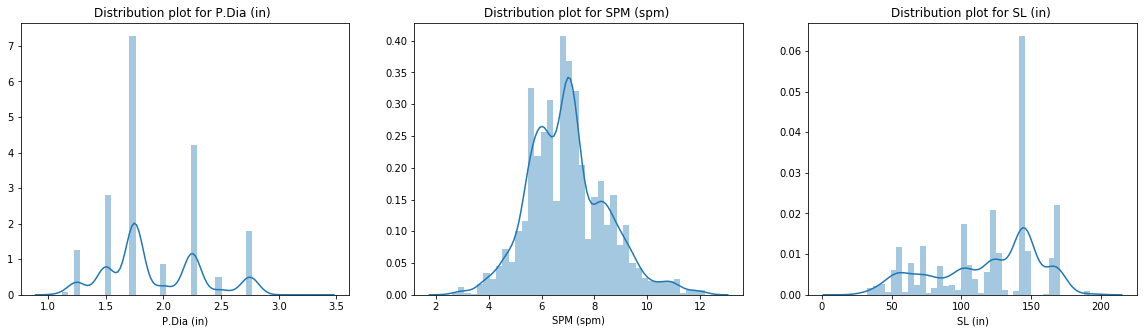

In [32]:
# plotting distribution plots: 
my_frame=df[['P.Dia (in)', 'SPM (spm)','SL (in)']]     # Main columns to visalize 
plot_dist(1,3,df=my_frame,fig_size=(20,5),bins=40)


# df_vis=df.drop(['Fillage_low','Fillage_medium','Fillage_high'], axis=1)   #to visualize all columns except dummy variables
# plot_dist(6,2,df=df_vis,fig_size=(30,35),bins=40)

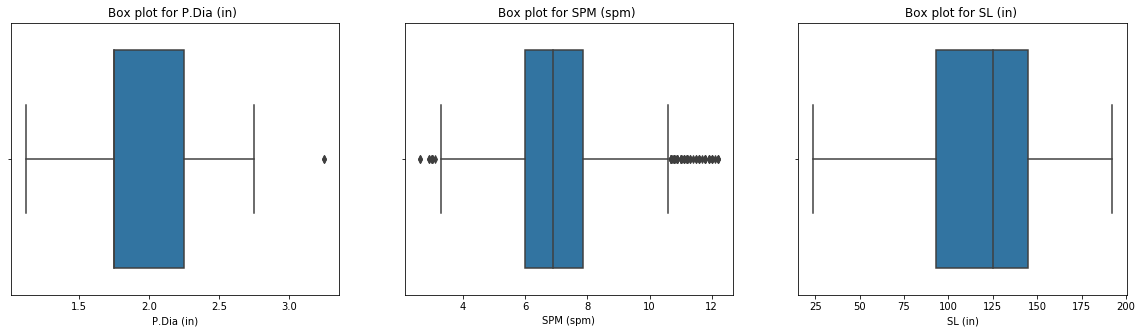

In [33]:
# plotting box plots: 
my_frame=df[['P.Dia (in)', 'SPM (spm)','SL (in)']]     # Main columns to visalize 
plot_box(1,3,df=my_frame,fig_size=(20,5))


# df_vis=df.drop(['Fillage_low','Fillage_medium','Fillage_high'], axis=1)   #to visualize all columns except dummy variables
# plot_box(6,2,df=df_vis,fig_size=(20,35))

## C- Matching Standard check:

In [34]:
# Exploring some columns values to check if it is matching standard or logical values:

 ################## function need check
    
pumps_std = [1.25,1.5,1.75,2,2.25,2.75,3.75]
sl_std = [x for x in range (20,168)]
spm_std= [x for x in range (6,8)]
fillage_std= [x for x in range (0,101)]
def check_stn_match(cols=[],standard_values=[]):
    check_match=[]
    check_not_match=[]
    myres={}
    for col,std in zip (cols, standard_values):
        values = df[col].unique()  
        for value in values:
            if value in std:
                check_match.append('on')
            else:
                check_not_match.append('on')
        if len(check_not_match) > 0:
            myres[col] = 'Not Matching'
        else: 
            myres[col] = 'Matching'
    return myres

check_stn_match(cols=['P.Dia (in)', 'SL (in)', 'SPM (spm)', 'Fillage (%)'], standard_values=[pumps_std,sl_std,spm_std,fillage_std])


{'P.Dia (in)': 'Not Matching',
 'SL (in)': 'Not Matching',
 'SPM (spm)': 'Not Matching',
 'Fillage (%)': 'Not Matching'}

In [35]:
################# need to handle mismatching values

In [36]:
df_org=df

## Section-4: Visualizing clean data:


### Count plot:

In [37]:
def plot_count (df=pd.DataFrame(), col='', bins=[],labels=[]):
    data=pd.DataFrame()
    if len(bins) != 0 :
        data['modified']=pd.cut(df[col],bins,labels=labels)
        fig, ax =plt.subplots()
        sns.countplot(data['modified'], ax=ax)
        plt.xlabel(col)
        total=float(len(data['modified']))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/total),
                    ha="center")
    else:
        fig, ax =plt.subplots()
        sns.countplot(df[col], ax=ax)
        plt.xlabel(col)
        total=float(len(df[col]))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/total),
                    ha="center")
        

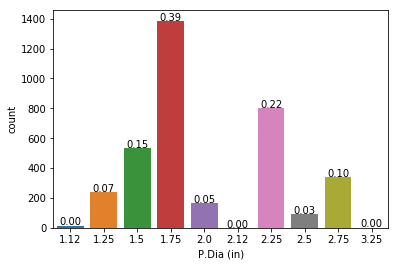

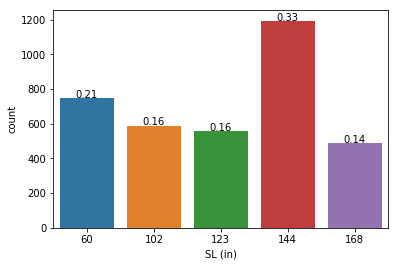

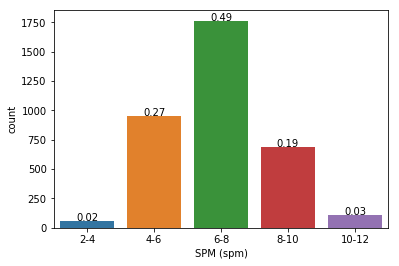

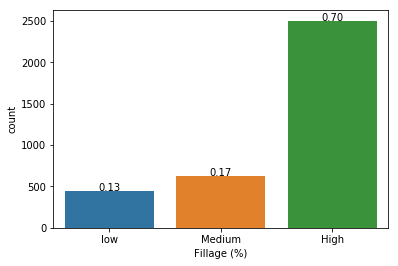

In [38]:
col_names=['P.Dia (in)','SL (in)','SPM (spm)','Fillage (%)']
bins=[[],[0,80,110,125,150,250],[2,4,6,8,10,12],[0,35,70,100]]
labels=[[],['60','102','123','144','168'],['2-4','4-6','6-8','8-10','10-12'],['low','Medium','High']]
for i, j,k in zip(col_names,bins,labels):
    plot_count(df=df,col=i,bins=j,labels=k)
   

In [39]:
# plot_count(df=df,col='SPM (spm)',bins=[2,4,6,8,10,12],labels=['2-4','4-6','6-8','8-10','10-12'])

## Bar plot:

In [40]:
def plot_bar(n_rows,n_cols,df=pd.DataFrame(),fig_size=(20,5)):
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size)
    y=df['PRHP']
    df=df.drop('PRHP',axis=1)
    mycols=df.columns
    col_index=0
    if n_rows > 1:
        for row in range (n_rows):
            for col in range (n_cols-1):
                sns.barplot(x=df[mycols[col_index]],y=y,data=df, ax= ax[row][col])
                ax[row][col].set_title('Bar plot for {} against PRHP'.format(mycols[col_index]))
                col_index +=1

    else:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.barplot(x = df[mycols[col_index]], y =y, data=df, ax= ax[col])
                ax[col].set_title('Bar plot for {} against PRHP'.format(mycols[col_index]))
                col_index +=1


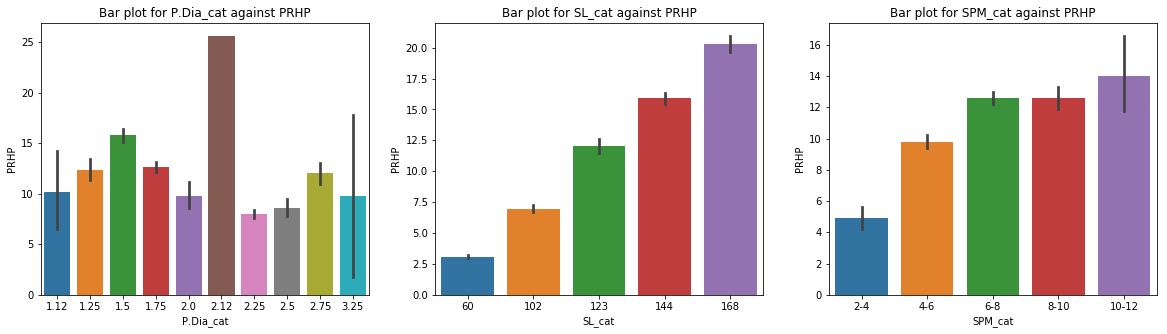

In [41]:
d=pd.DataFrame()
d['P.Dia_cat']=df['P.Dia (in)']
d['SL_cat']= pd.cut(df['SL (in)'], bins=[0,80,110,125,150,250],labels=['60','102','123','144','168'])
d['SPM_cat']= pd.cut(df['SPM (spm)'], bins=[2,4,6,8,10,12],labels=['2-4','4-6','6-8','8-10','10-12'])
d['PRHP']=df['PRHP']
myframe=d[['P.Dia_cat','SL_cat','SPM_cat','PRHP']]
plot_bar(1,3,df=myframe,fig_size=(20,5))

## Regression plots:

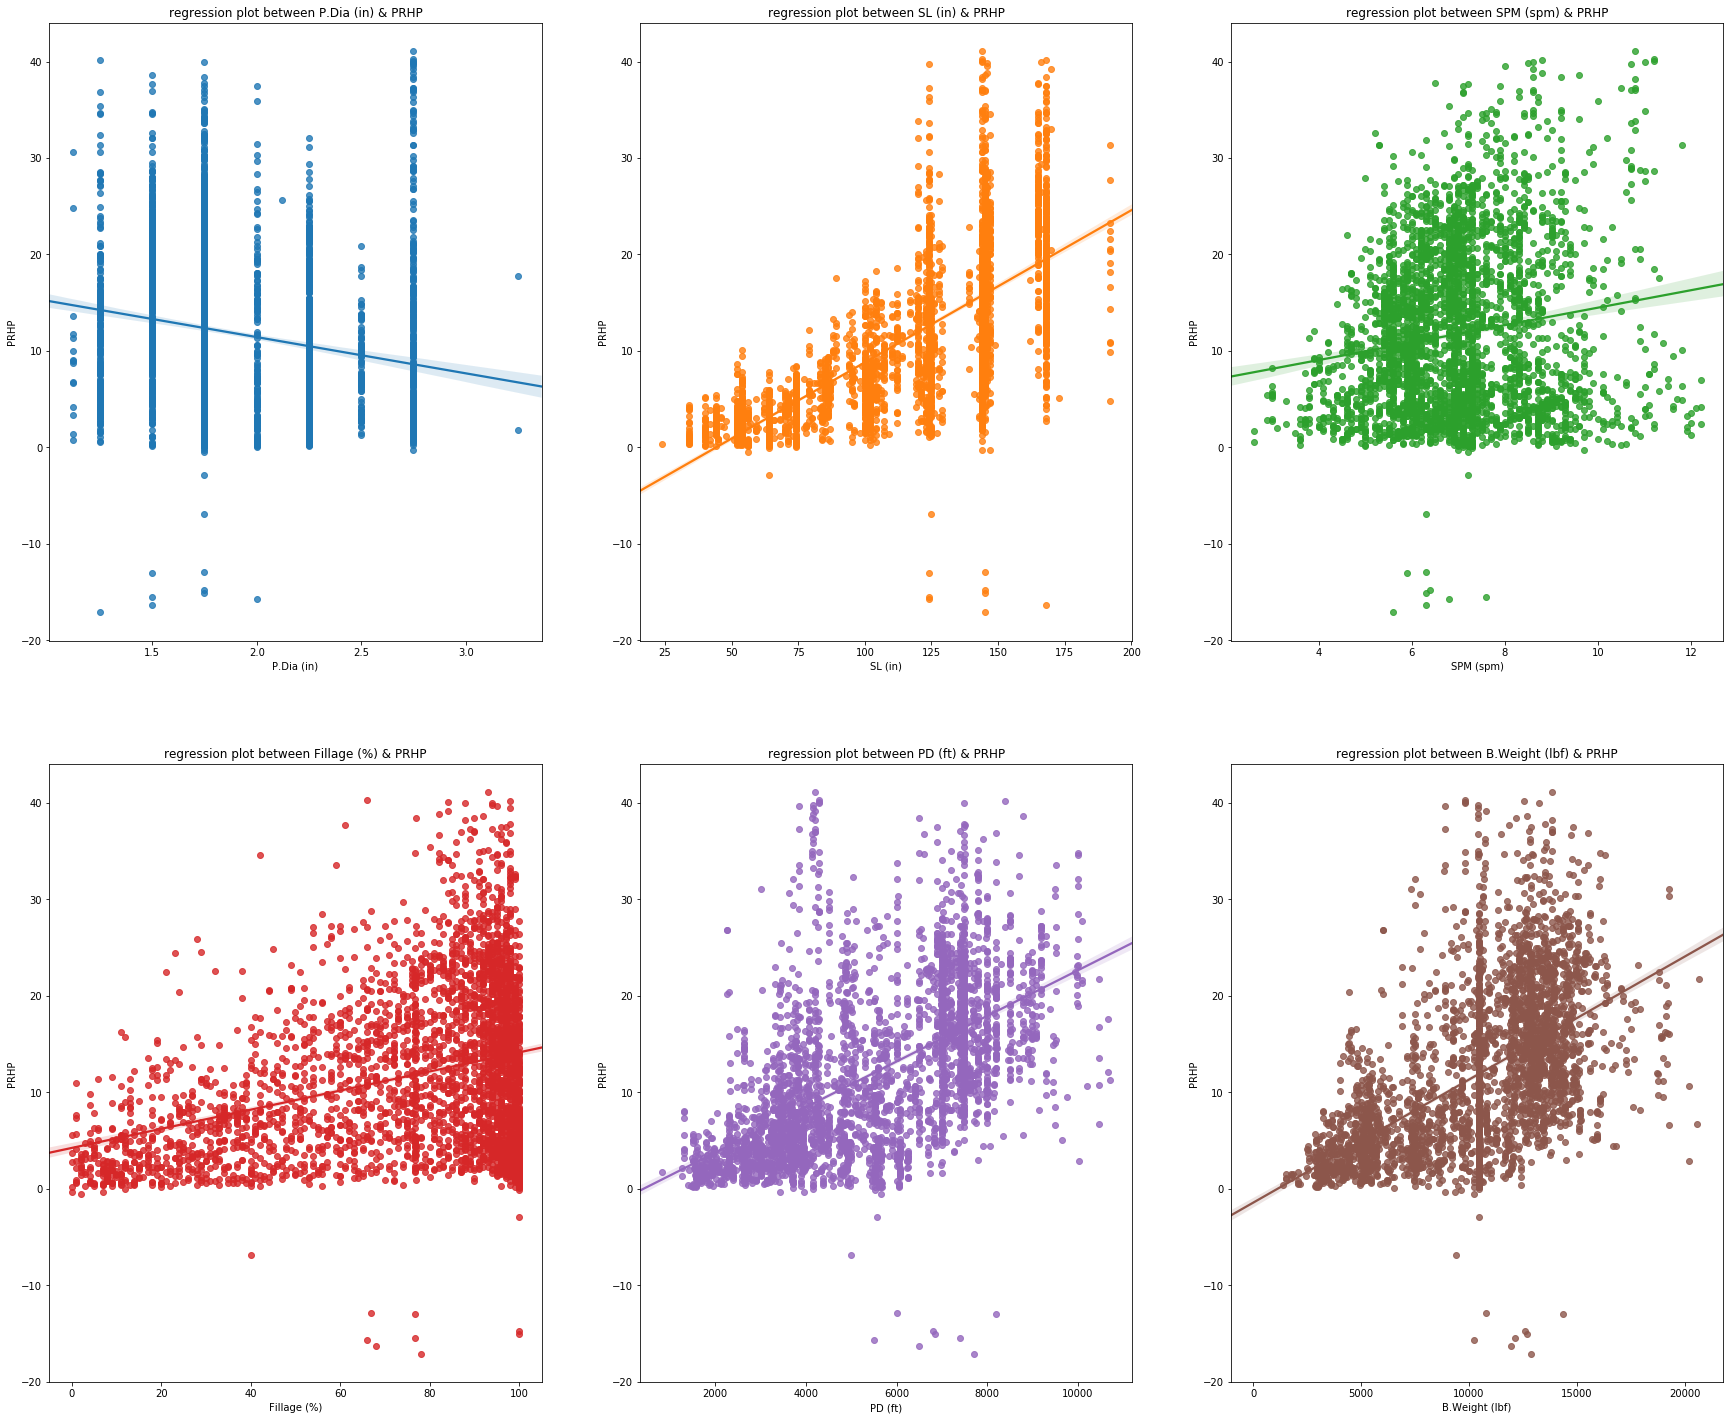

In [42]:
def plot_reg(n_rows,n_cols,df=pd.DataFrame(),fig_size=(20,5)):
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=fig_size)
    y=df['PRHP']
    df=df.drop('PRHP',axis=1)
    mycols=df.columns
    col_index=0
    if n_rows > 1:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.regplot(x=df[mycols[col_index]], y=y,data=df, ax= ax[row][col])
                ax[row][col].set_title('regression plot between {} & PRHP'.format(mycols[col_index]))
                col_index +=1
    else:
        for row in range (n_rows):
            for col in range (n_cols):
                sns.regplot(x=df[mycols[col_index]], y=y,data=df, ax= ax[col])
                ax[col].set_title('regression plot between {} & PRHP'.format(mycols[col_index]))
                col_index +=1
myframe=df[['P.Dia (in)','SL (in)','SPM (spm)','Fillage (%)', 'PD (ft)','B.Weight (lbf)', 'PRHP']]                
plot_reg(2,3,df=myframe,fig_size=(30,25))

## Pairplot:

In [43]:
# sns.pairplot(df)
# df=df.drop(['Fillage_low','Fillage_medium','Fillage_high','PPMPL (lb)','MPMPL (lb)','Friction (lb)'],axis=1)
# sns.pairplot(df,hue='Fillage (%)',palette='coolwarm')

# Section-5: Interactive visualization:

In [44]:
# init_notebook_mode(connected=True)
# # For offline use
# cf.go_offline()

In [45]:
# df=df[['P.Dia (in)','SL (in)','SPM (spm)','Fillage (%)']]
# df.iplot(kind='histogram')

In [46]:
# from plotly import __version__


In [47]:
# print(__version__) # requires version >= 1.9.0

In [48]:
# df.mean().iplot(kind='bar')

In [49]:
# df.iplot(kind='box')

In [50]:
# df=df_org[['P.Dia (in)','SL (in)','PRHP']]
# df.iplot(kind='surface')

In [51]:
df.shape

(3579, 14)

In [52]:
df.head()

,P.Dia (in),SL (in),SPM (spm),B.Weight (lbf),Fillage (%),PD (ft),PIP (psi),PPMPL (lb),MPMPL (lb),Friction (lb),PRHP,Fillage_low,Fillage_medium,Fillage_high
1,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",494.0,"1,550.0",-174.0,174.0,3.6,0,0,1
2,2.25,112.0,6.7,"4,885.0",99.0,"1,950.0",527.0,"1,864.0",-36.0,36.0,3.7,0,0,1
3,2.25,112.0,6.7,"4,885.0",99.0,"1,925.0",505.0,"1,793.0",-81.0,81.0,2.5,0,0,1
4,2.25,128.0,8.2,"3,257.0",99.0,"1,300.0",445.20226996351846,"2,072.0",-159.0,159.0,5.6,0,0,1
5,2.25,128.0,8.2,"3,257.0",99.0,"1,300.0",160.0,"2,485.0",-524.0,524.0,7.3,0,0,1


In [53]:
df.columns

Index(['P.Dia (in)', 'SL (in)', 'SPM (spm)', 'B.Weight (lbf)', 'Fillage (%)',
       'PD (ft)', 'PIP (psi)', 'PPMPL (lb)', 'MPMPL (lb)', 'Friction (lb)',
       'PRHP', 'Fillage_low', 'Fillage_medium', 'Fillage_high'],
      dtype='object')

In [55]:
df.to_excel('output.xlsx')